In [3]:
!pip install autogluon --upgrade

# Importando as bibliotecas necessárias
import pandas as pd
from autogluon.tabular import TabularPredictor

# Carregar os dados
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('diabetes_data_upload.csv')

# Verificando as colunas
print(df.columns)

# Convertendo variáveis categóricas para strings (AutoGluon lida com isso automaticamente)
df['Gender'] = df['Gender'].astype(str)
df['class'] = df['class'].astype(str)  # Converte a classe para string para classificação

# Dividir o conjunto de dados em dados de treinamento e teste
train_data = df.sample(frac=0.8, random_state=50)  # 80% dos dados para treinamento
test_data = df.drop(train_data.index)  # 20% dos dados para teste

# Inicializando o AutoGluon para prever a coluna 'class'
predictor = TabularPredictor(label="class", eval_metric="accuracy").fit(train_data)

# Avaliação do modelo com dados de teste
performance = predictor.evaluate(test_data)
print(performance)

# Resultados detalhados de cada modelo testado
predictor.leaderboard(test_data, silent=True)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.0/138.0 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 9.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 16.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might

No path specified. Models will be saved in: "AutogluonModels/ag-20241118_062346"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       11.30 GB / 12.67 GB (89.1%)
Disk Space Avail:   65.92 GB / 107.72 GB (61.2%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : F

Saving diabetes_data_upload.csv to diabetes_data_upload.csv
Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')


Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20241118_062346"
Train Data Rows:    416
Train Data Columns: 16
Label Column:       class
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  ['Positive', 'Negative']
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during Predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression', 'quantile'])
Problem Type:       binary
Preprocessing data ...
Selected class <--> label mapping:  class 1 = Positive, class 0 = Negative
	Note: For your binary classification, AutoGluon arbitrarily selected which label-value represents positive (Positive) vs negative (Negative) class.
	To explicitly set the positive_class, either rename classes to 1 and 0, or specify positive_class in Predictor init.
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipe

{'accuracy': 0.9615384615384616, 'balanced_accuracy': 0.9638655462184874, 'mcc': 0.9147551933532179, 'roc_auc': 0.9974789915966387, 'f1': 0.9710144927536232, 'precision': 0.9852941176470589, 'recall': 0.9571428571428572}


,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,NeuralNetFastAI,0.990385,0.988095,accuracy,0.027120,0.009354,1.800494,0.027120,0.009354,1.800494,1,True,10
1,RandomForestGini,0.990385,0.976190,accuracy,0.082438,0.061961,1.089572,0.082438,0.061961,1.089572,1,True,5
2,RandomForestEntr,0.990385,0.976190,accuracy,0.093322,0.069967,1.042221,0.093322,0.069967,1.042221,1,True,6
3,ExtraTreesGini,0.990385,0.976190,accuracy,0.100885,0.087256,0.757355,0.100885,0.087256,0.757355,1,True,8
4,ExtraTreesEntr,0.980769,0.988095,accuracy,0.075314,0.087168,0.784448,0.075314,0.087168,0.784448,1,True,9
5,LightGBM,0.961538,0.988095,accuracy,0.006888,0.001954,0.398667,0.006888,0.001954,0.398667,1,True,4
6,CatBoost,0.961538,0.976190,accuracy,0.008668,0.001148,0.932337,0.008668,0.001148,0.932337,1,True,7
7,NeuralNetTorch,0.961538,1.000000,accuracy,0.011903,0.007714,6.174510,0.011903,0.007714,6.174510,1,True,12
8,WeightedEnsemble_L2,0.961538,1.000000,accuracy,0.014747,0.008972,6.425774,0.002844,0.001258,0.251264,2,True,14
9,LightGBMLarge,0.932692,0.988095,accuracy,0.003617,0.001344,0.499324,0.003617,0.001344,0.499324,1,True,13


              model  score_test  score_val eval_metric  pred_time_test  \
0   NeuralNetFastAI    0.990385   0.988095    accuracy        0.082100   
1  RandomForestGini    0.990385   0.976190    accuracy        0.173402   
2    ExtraTreesGini    0.990385   0.976190    accuracy        0.217008   
3  RandomForestEntr    0.990385   0.976190    accuracy        0.294680   
4    ExtraTreesEntr    0.980769   0.988095    accuracy        0.229398   

   pred_time_val  fit_time  pred_time_test_marginal  pred_time_val_marginal  \
0       0.009354  1.800494                 0.082100                0.009354   
1       0.061961  1.089572                 0.173402                0.061961   
2       0.087256  0.757355                 0.217008                0.087256   
3       0.069967  1.042221                 0.294680                0.069967   
4       0.087168  0.784448                 0.229398                0.087168   

   fit_time_marginal  stack_level  can_infer  fit_order  
0           1.800494  

<ipython-input-5-0863002196c9>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=leaderboard_df, x='model', y='score_test', palette='viridis')


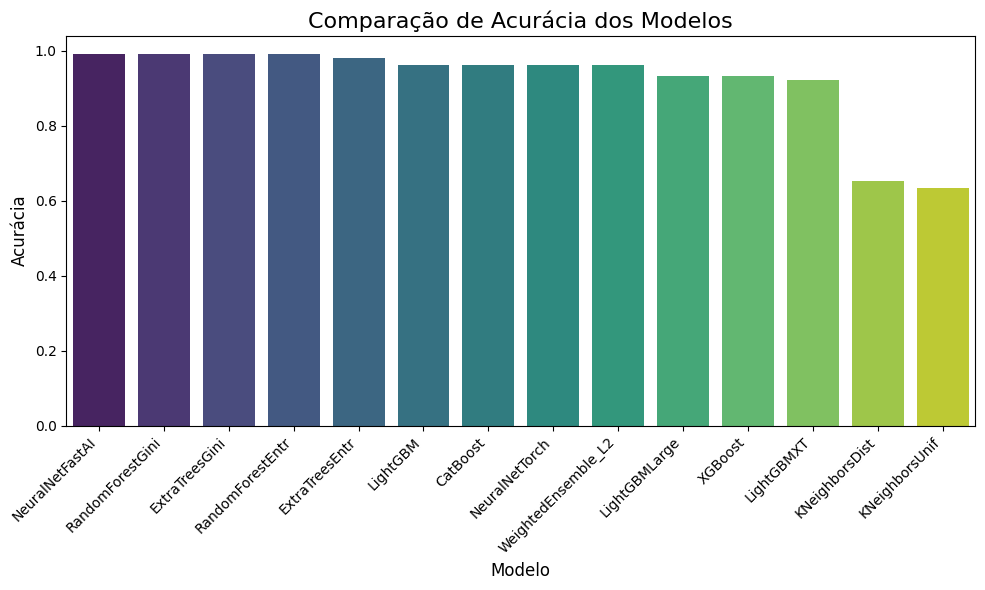

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Supondo que você já tenha obtido o resultado do leaderboard e armazenado em um DataFrame
leaderboard_df = predictor.leaderboard(test_data, silent=True)

# Exibindo as primeiras linhas do DataFrame para confirmar a estrutura
print(leaderboard_df.head())

# Gerando o gráfico de barras para mostrar a acurácia de cada modelo
plt.figure(figsize=(10, 6))
sns.barplot(data=leaderboard_df, x='model', y='score_test', palette='viridis')

# Personalizando o gráfico
plt.title('Comparação de Acurácia dos Modelos', fontsize=16)
plt.xlabel('Modelo', fontsize=12)
plt.ylabel('Acurácia', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotacionando os nomes dos modelos para facilitar a leitura
plt.tight_layout()  # Ajustando o layout para não cortar partes do gráfico

# Exibindo o gráfico
plt.show()
